In [1]:
import numpy as np
import os
import tensorflow as tf
from tensorflow import keras
# from keras.callbacks import EarlyStopping

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import matplotlib
import sys
from matplotlib import cm

In [2]:
%cd /Users/Kunal/Projects/TCH_CardiacSignals_F20/

/Users/kunal/Projects/TCH_CardiacSignals_F20


In [3]:
data = np.load(os.path.join("Working_Data", "Fixed_Dim_HBs_Idx" + "1" + ".npy"))
lead_1 = data[:,:,0]
lead_2 = data[:,:,1]
lead_3 = data[:,:,2]
lead_4 = data[:,:,3]

lead_1_train = lead_1
# lead_1_test = lead_1[30000:]

# Use the entire lead train an autoencoder for each lead and then run the encoder on the leads train data


In [37]:
#encoder
encoding_dim = 1
input_hb = keras.Input(shape = (100,))
es = keras.callbacks.EarlyStopping(monitor='loss', mode='min', verbose=1, patience=10)
# encoded = keras.layers.Dense(250, activation='relu')(input_hb)
# encoded = keras.layers.Dropout(0.5)(encoded)
# encoded = keras.layers.Dense(32, activation='relu')(encoded)
# encoded = keras.layers.Dense(56, activation='relu')(encoded)
# encoder_output = keras.layers.Dense(125, activation='relu')(encoded)
#
# decoded = keras.layers.Dense(250, activation='relu')(encoder_output)
# decoded = keras.layers.Dropout(0.5)(decoded)
# decoded = keras.layers.Dense(512, activation='relu')(decoded)
# decoded = keras.layers.Dense(100, activation='linear')(decoded)
#
# autoencoder = keras.Model(inputs=input_hb, outputs=decoded)
#
# encoder = keras.Model(inputs=input_hb, outputs=encoder_output)

encoded = keras.layers.Dense(encoding_dim, activation = 'tanh')(input_hb)
decoded = keras.layers.Dense(100, activation = "sigmoid")(encoded)

# maps input to reconstruction
autoencoder = keras.Model(input_hb, decoded)

encoder = keras.Model(input_hb, encoded)

autoencoder.compile(optimizer='adam', loss = 'mse')


print("done compiling")
# callbacks=[es]
autoencoder.fit(lead_1, lead_1, epochs = 50, shuffle=False)

done compiling
Epoch 1/50
1449/1449 [==============================] - 1s 916us/step - loss: 1.9784

In [38]:
reconstruction = autoencoder.predict(lead_1)
encode = encoder.predict(lead_1)

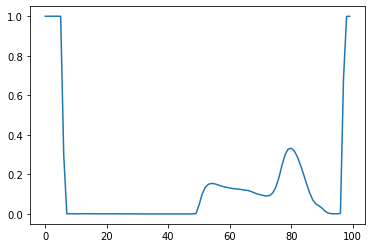

In [40]:
# plt.figure()
plt.plot(reconstruction[2900])

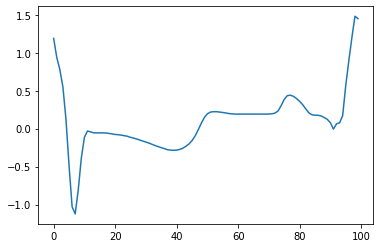

In [23]:
plt.plot(lead_1[2900])

In [18]:
#%




array([5.7718134], dtype=float32)